<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S2_C3_RDG_Marketing_target_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  # Para el manejo de los datos
import numpy as np # Para el manejo de operaciones entre datos, y las columnas
import matplotlib.pyplot as plt # Para el manejo de las graficas
import seaborn as sns # Para el manejo de graficas

1. Importar los datos

In [ ]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET')

#mostar lista de archivos
os.listdir()

['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl']

In [ ]:
df = pd.read_excel('marketing_extract_2X_Income.xlsx')

2. Explorar los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MntMeatProducts  2216 non-null   int64
 1   MntWines         2216 non-null   int64
 2   Income           2216 non-null   int64
dtypes: int64(3)
memory usage: 52.1 KB


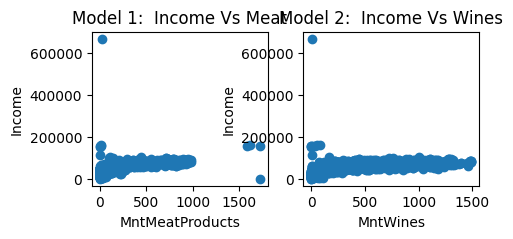

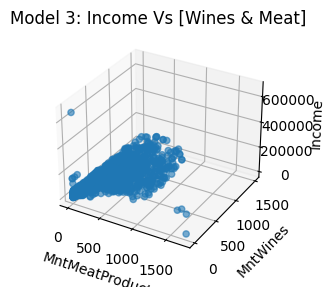

In [ ]:
plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('Model 1:  Income Vs Meat')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')


plt.subplot(1,2,2)
plt.scatter(df['MntWines'],df['Income'])
plt.title('Model 2:  Income Vs Wines')
plt.xlabel('MntWines')
plt.ylabel('Income')

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MntMeatProducts'],df['MntWines'],df['Income'], alpha = 0.6)
ax.set_xlabel('MntMeatProducts')
ax.set_ylabel('MntWines')
ax.set_zlabel('Income')
ax.set_title('Model 3: Income Vs [Wines & Meat]')
plt.show()

In [ ]:
# --- >  Eliminar datos átipicos de Income
#---------------------------------------
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['Income'] < (Q1-1.5*IQR))|(df['Income'] > (Q3+1.5*IQR)))]

In [ ]:
# --- >  Eliminar datos átipicos de MntMeatProducts
#---------------------------------------
Q1 = df['MntMeatProducts'].quantile(0.25)
Q3 = df['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntMeatProducts'] < (Q1-1.5*IQR))|(df['MntMeatProducts'] > (Q3+1.5*IQR)))]

In [ ]:
# --- >  Eliminar datos átipicos de MntWines
#---------------------------------------
Q1 = df['MntWines'].quantile(0.25)
Q3 = df['MntWines'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntWines'] < (Q1-1.5*IQR))|(df['MntWines'] > (Q3+1.5*IQR)))]

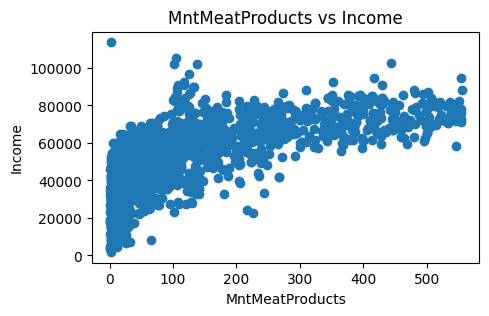

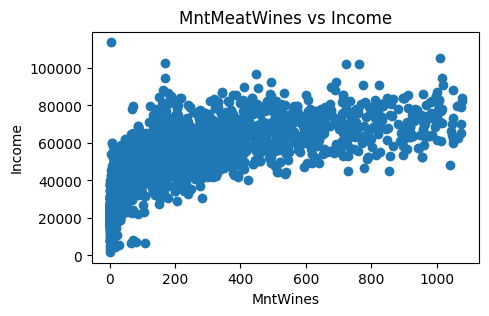

In [ ]:

plt.figure(figsize=(5,3))
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(df['MntWines'],df['Income'])
plt.title('MntMeatWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

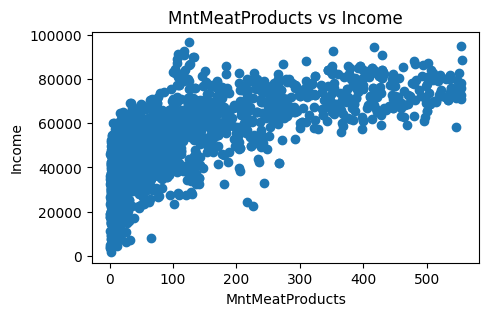

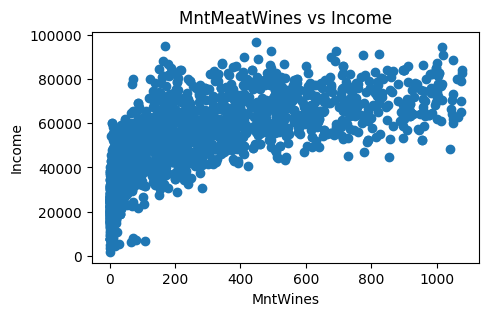

In [ ]:
df = df[df['Income']< 100000]

plt.figure(figsize=(5,3))
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(df['MntWines'],df['Income'])
plt.title('MntMeatWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

# 2. Inicialización de parámetros

In [ ]:
theta = 80
intercept = 5000

# 3. Una iteración RGD Regresión Gradiente Decendente

In [ ]:
# y = b + mX
# h = b + Theta(X1)
# h = theta_0 + theta_1(X)
df['Hipotesis'] = intercept + theta * df['MntMeatProducts']

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

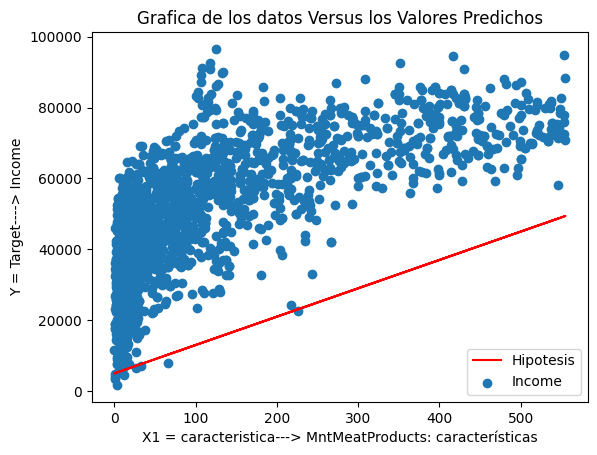

In [ ]:
plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = caracteristica---> MntMeatProducts: características')
plt.ylabel('Y = Target----> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

In [ ]:
# Calcule el error cuadratico medio MSE = cost = lost
# MSE = (h-Y)**2/m
# h = Hipotesis
# m = cantidad total de datos calculados hacieno la hipotesis o el numero de registros
h = df['Hipotesis']
Y = df['Income']
X1 = df['MntMeatProducts']
m = len(df)
MSE = np.mean((h-Y)**2)
MSE = print( f'El error cuadratico medio es: {round(MSE,2)}')

El error cuadratico medio es: 1365248812.66


In [ ]:
# Actualice los parámetros
theta_0 = intercept
theta_1 = theta
alpha = 0.00001 # este valor entre 0 y 1

In [ ]:
theta_0

5000

In [ ]:
theta_1

80

In [ ]:
# Actualizacion de theta
theta_0 = theta_0 - alpha * (2/m) * np.sum((h - Y)) # np=libreria numpa -- sum= suma de las iteraciones
theta_0

5000.687580627849

In [ ]:
# Actualización de theta_1
theta_1 = theta_1 - alpha * (2/m) * np.dot(X1.T,(h - Y)) # np=libreria numpa -- sum= suma de las iteraciones
theta_1

165.17064279493673

In [ ]:
# Visualice la nueva recta

In [ ]:
H_new = theta_0 + theta_1 * X1

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

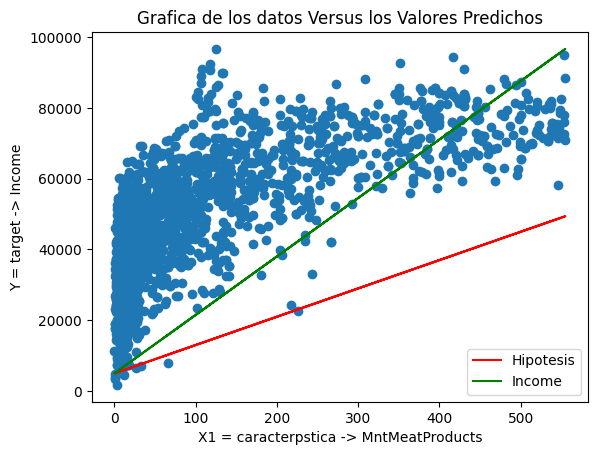

In [ ]:
plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.plot(df['MntMeatProducts'],H_new,color='green')
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = caracterpstica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

In [ ]:
# Calcule la bondad de ajuste
SSE = np.sum((H_new- Y)**2)

Y_mean = np.mean(Y)
SST = np.sum((Y - Y_mean)**2)
R2 = 1 - SSE/SST
R2

-1.3804418123941211

In [ ]:
theta = np.random.randn(2,1)


In [ ]:
theta

array([[ 0.32600876],
       [-0.22239904]])

# Actividad 2. Realice un ciclo for para n_iteraciones

In [ ]:
from statsmodels.tools.tools import add_constant

In [ ]:
#  ----------DataSet y Parametros
#Target
Y = df['Income']
#Características
X1 = df['MntMeatProducts']
# Hiperparámetros
alpha = 0.0001
n_iteraciones = 100


In [ ]:
  X1 = add_constant(X1)
  H= np.dot(X1,theta)

In [ ]:
# Inicializar parámetros

def my_RGD(Y,X1,alpha,n_iteraciones):
  theta = np.random.randn(2,1)
  X1 = add_constant(X1)
  for i in range(n_iteraciones):
    H= np.dot(X1,theta)


